___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# Tasks

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 
    

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
#pd.set_option('display.width', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Load Dataset

In [2]:
cus = pd.read_csv('Mall_Customers.csv')
cus

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df = cus.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape, df.size

((200, 5), 1000)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [9]:
# The values of the CustomerID column are unique to all customers, so we can drop it
del df['CustomerID']

In [10]:
df.rename({'Annual Income (k$)': 'Annual_Income', 
           'Spending Score (1-100)': 'Spending_Score'}, axis='columns', inplace=True)

In [11]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.000,38.850,13.969,18.000,28.750,36.000,49.000,70.000
Annual_Income,200.000,60.560,26.265,15.000,41.500,61.500,78.000,137.000
Spending_Score,200.000,50.200,25.824,1.000,34.750,50.000,73.000,99.000


In [13]:
df.groupby('Gender').describe().T

Gender                Female    Male
Age            count 112.000  88.000
               mean   38.098  39.807
               std    12.644  15.515
               min    18.000  18.000
               25%    29.000  27.750
               50%    35.000  37.000
               75%    47.500  50.500
               max    68.000  70.000
Annual_Income  count 112.000  88.000
               mean   59.250  62.227
               std    26.012  26.638
               min    16.000  15.000
               25%    39.750  45.500
               50%    60.000  62.500
               75%    77.250  78.000
               max   126.000 137.000
Spending_Score count 112.000  88.000
               mean   51.527  48.511
               std    24.115  27.897
               min     5.000   1.000
               25%    35.000  24.500
               50%    50.000  50.000
               75%    73.000  70.000
               max    99.000  97.000

***object type columns***

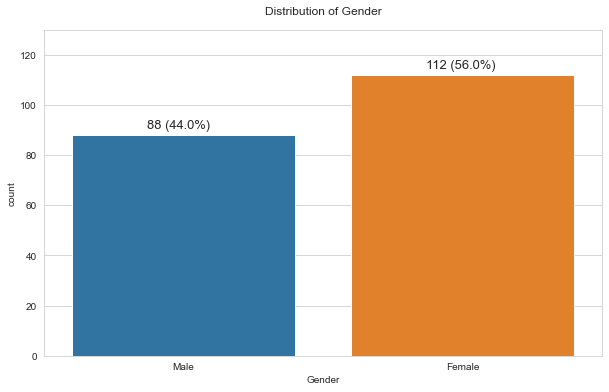

In [14]:
ax = sns.countplot(x='Gender', data=df)
for p in ax.patches:
    percentage = f'{p.get_height()} ({100 * p.get_height() / len(df):.1f}%)\n'
    ax.annotate(percentage, (p.get_x()+0.27, p.get_height()-3), fontsize=13)
ax.set_title('Distribution of Gender', pad=15)
ax.set_ylim(0, 130);  

***numeric columns***

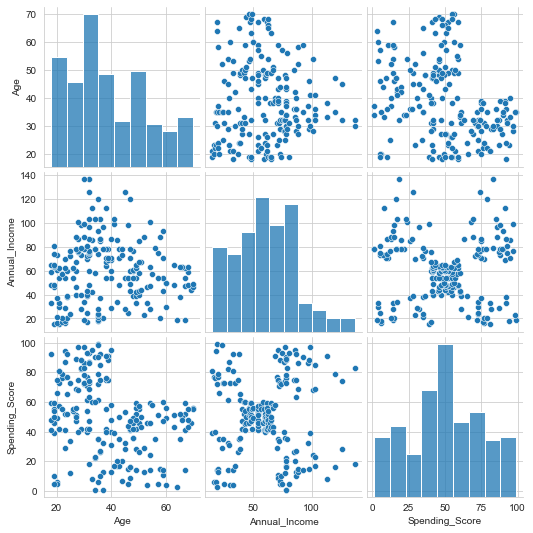

In [15]:
sns.pairplot(df.iloc[:, 1:])

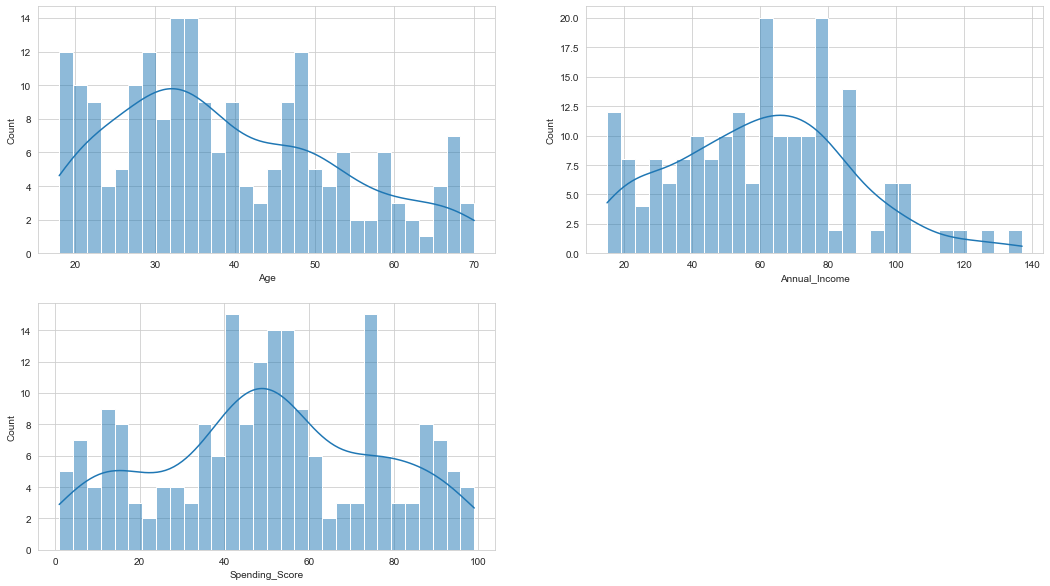

In [16]:
index = 0
plt.figure(figsize=(18,10))
for col in df.iloc[:, 1:]:    
    index += 1
    plt.subplot(2,2,index)
    sns.histplot(x=col, data=df, bins=30, kde=True)

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

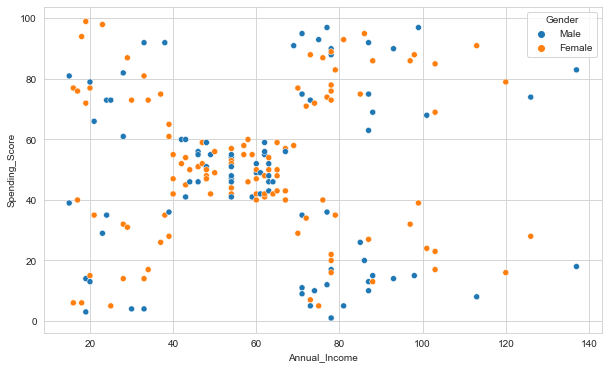

In [17]:
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Gender')
# it seems like we have five groups according to their annual income

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

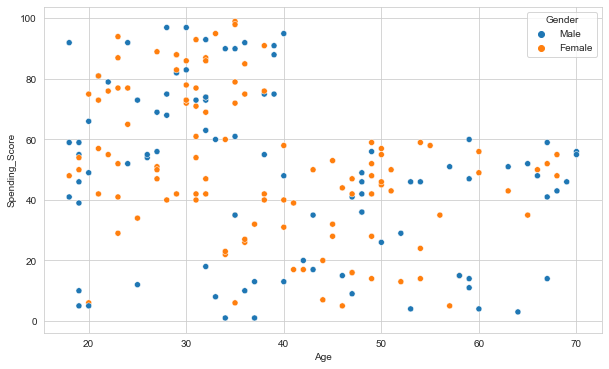

In [18]:
sns.scatterplot(data=df, x='Age', y='Spending_Score', hue='Gender')
# spending score is decreasing, as age increases

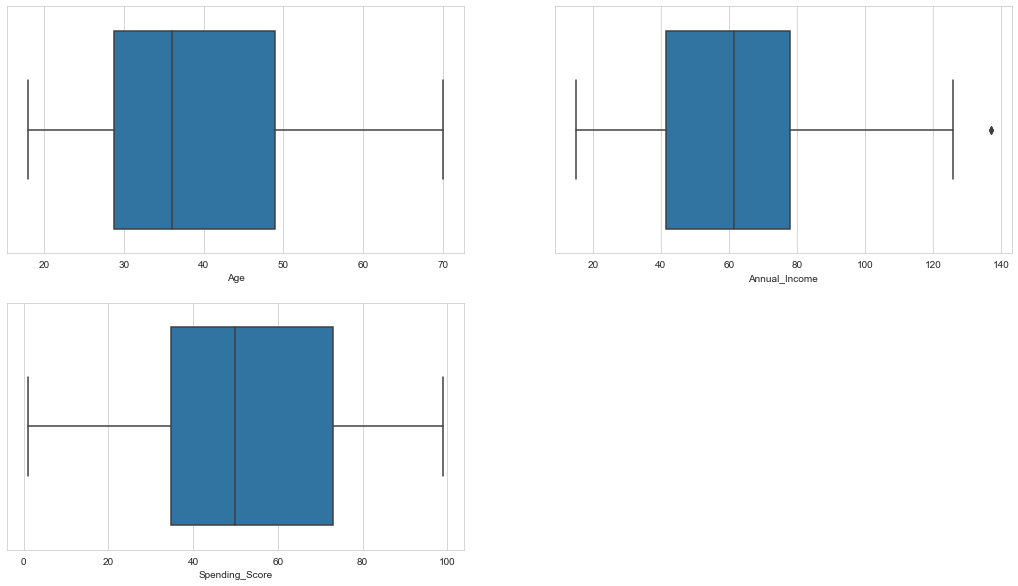

In [19]:
index = 0
plt.figure(figsize=(18,10))
for col in df.iloc[:, 1:]:    
    index += 1
    plt.subplot(2,2,index)
    sns.boxplot(data=df, x=col)

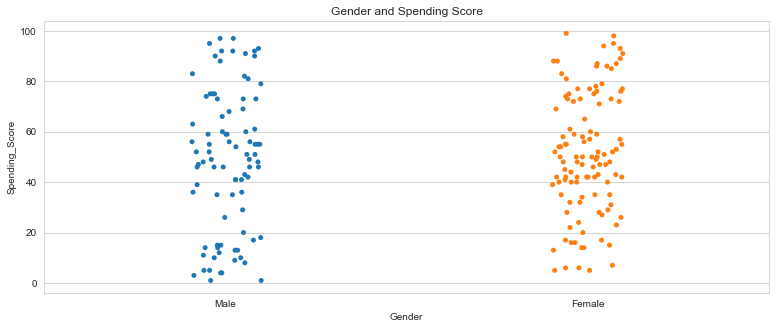

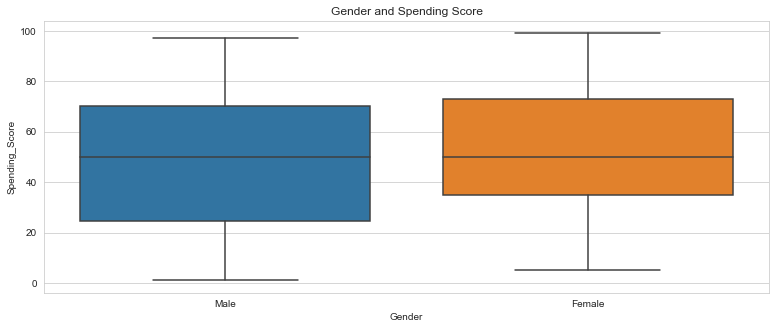

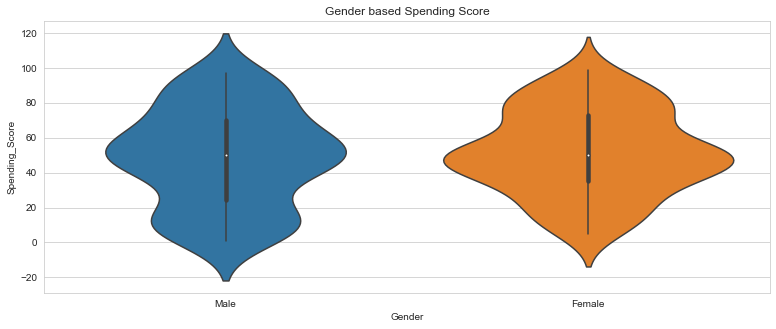

In [20]:
plt.figure(figsize=(13,5))
sns.stripplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(13,5))
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(13,5))
sns.violinplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender based Spending Score')
plt.show()

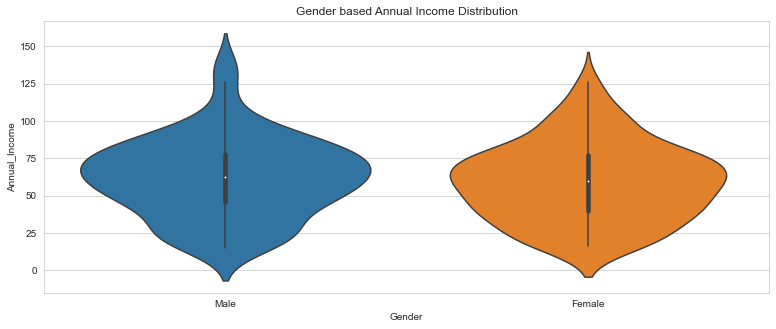

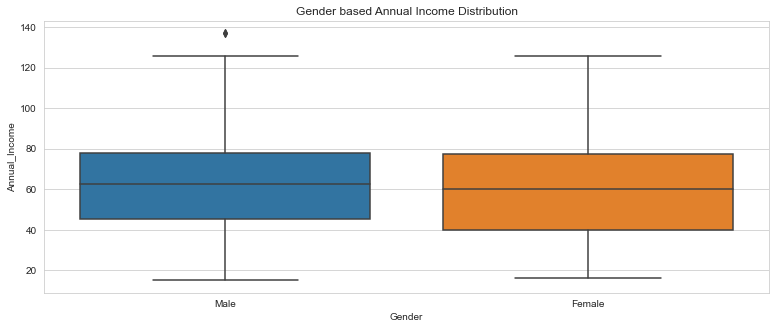

In [21]:
plt.figure(figsize=(13,5))
sns.violinplot(x='Gender', y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(13,5))
sns.boxplot(x='Gender', y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

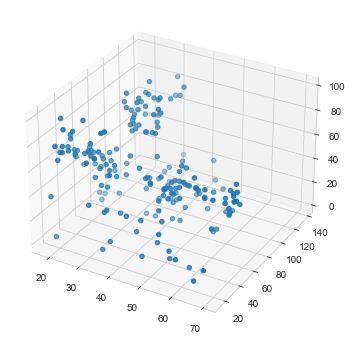

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual_Income'], df['Spending_Score']);

<AxesSubplot:>

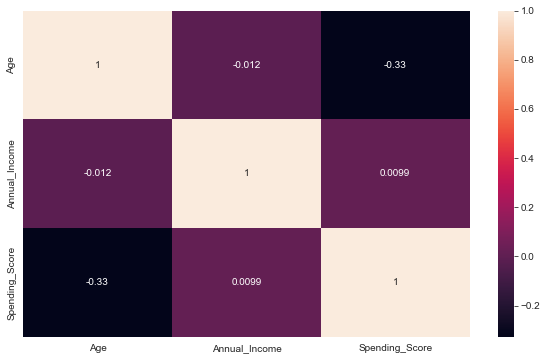

In [23]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
# it seems surprising that there is such a weak correlation between annual income and spending score

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [24]:
X1 = df[['Age', 'Spending_Score']]

In [25]:
# Hopkins Test
from pyclustertend import hopkins
hopkins(X1, X1.shape[0])

0.31010176648747245

#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'elbow method')

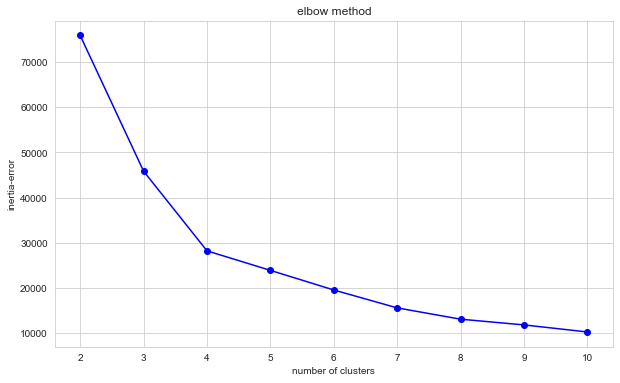

In [26]:
from sklearn.cluster import KMeans

ssd = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    ssd.append(kmeans.inertia_)
    
plt.plot(range(2, 11), ssd, "bo-", markersize=6)
plt.xlabel("number of clusters")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [27]:
ssd

[75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23838.248821646197,
 19483.1179104427,
 15514.193134351033,
 13006.483628851032,
 11738.02029695451,
 10173.03947811448]

In [28]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479
3,17675.093
4,4327.335
5,4355.131
6,3968.925
7,2507.710
8,1268.463
9,1564.981


<AxesSubplot:>

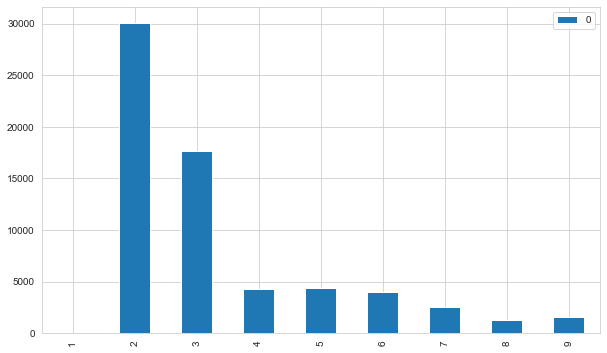

In [29]:
df_diff.plot(kind='bar')

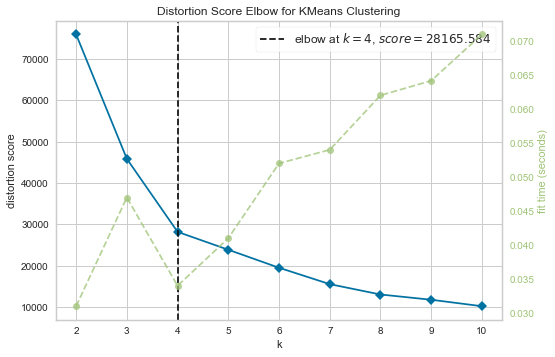

In [30]:
# yellowbrick

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,11))

visualizer.fit(X1)        
visualizer.show();

In [31]:
from sklearn.metrics import silhouette_score

for num_clusters in range(2,11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    
    silhouette_avg = silhouette_score(X1, kmeans.labels_)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


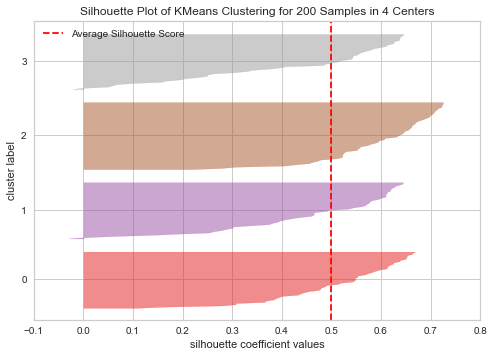

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X1)
visualizer.poof();

### Why silhouette_score is negative?

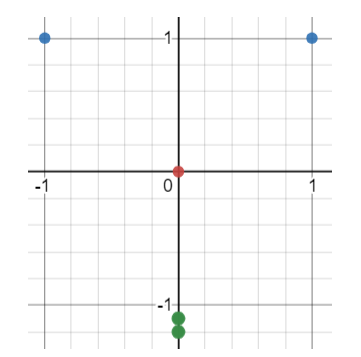

#### *iii. Apply K Means*

In [33]:
km_model1 = KMeans(n_clusters=4, random_state=42)
km_model1.fit(X1)

KMeans(n_clusters=4, random_state=42)

In [34]:
km_model1.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [35]:
df['predicted_clusters_1'] = km_model1.labels_

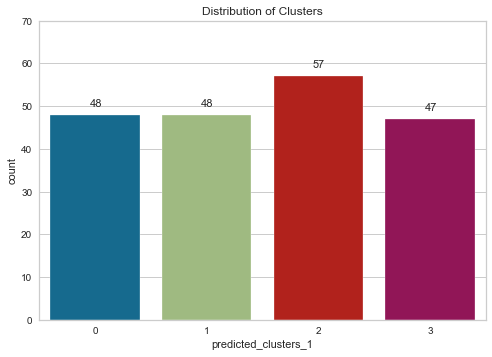

In [36]:
ax = sns.countplot(x='predicted_clusters_1', data=df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+2), fontsize=11)
    
ax.set_title('Distribution of Clusters')    
ax.set_ylim(0, 70);

In [37]:
df.sample(10)

,Gender,Age,Annual_Income,Spending_Score,predicted_clusters_1
153,Female,38,78,76,2
65,Male,18,48,59,3
90,Female,68,59,55,0
163,Female,31,81,93,2
85,Male,48,54,46,0
141,Male,32,75,93,2
182,Male,46,98,15,1
29,Female,23,29,87,2
18,Male,52,23,29,1
81,Male,38,54,55,3


#### *iv. Visualizing and Labeling All the Clusters*

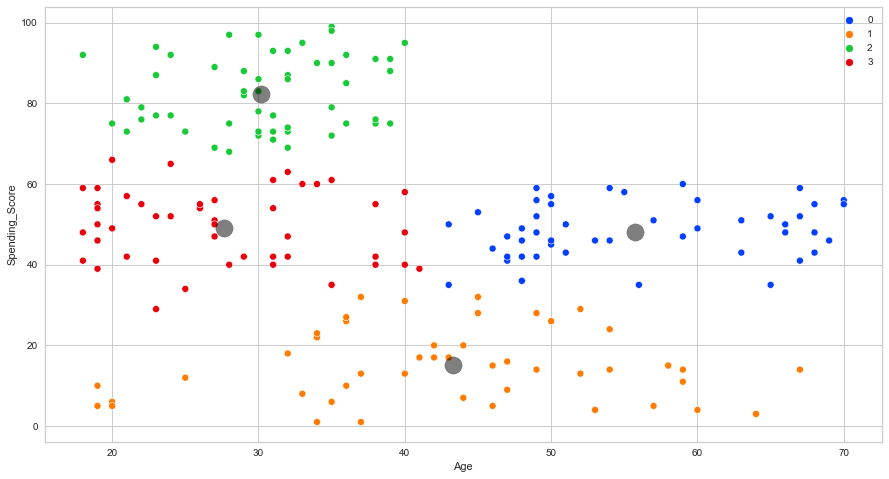

In [38]:
# centers of classes
plt.figure(figsize = (15,8))
centers = km_model1.cluster_centers_
sns.scatterplot(data=X1, x='Age', y='Spending_Score', hue=km_model1.labels_, palette='bright')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [39]:
X2 = df[['Annual_Income', 'Spending_Score']]

In [40]:
# Hopkins Test
hopkins(X2, X2.shape[0])

0.3200360602151852

#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'elbow method')

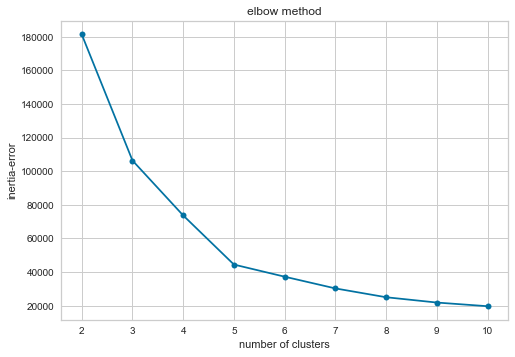

In [41]:
from sklearn.cluster import KMeans

ssd = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)
    
plt.plot(range(2,11), ssd, "bo-", markersize=6)
plt.xlabel("number of clusters")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [42]:
ssd

[181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21850.16528258562,
 19672.07284901432]

In [43]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.223
3,32668.584
4,29231.334
5,7214.641
6,6974.157
7,5247.818
8,3161.674
9,2178.092


<AxesSubplot:>

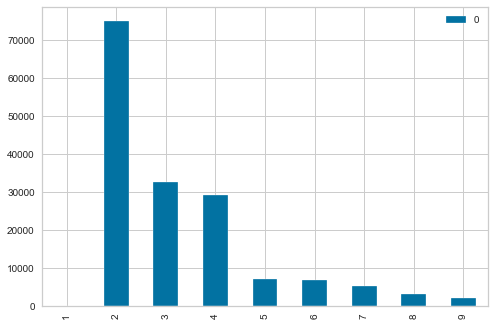

In [44]:
df_diff.plot(kind='bar')

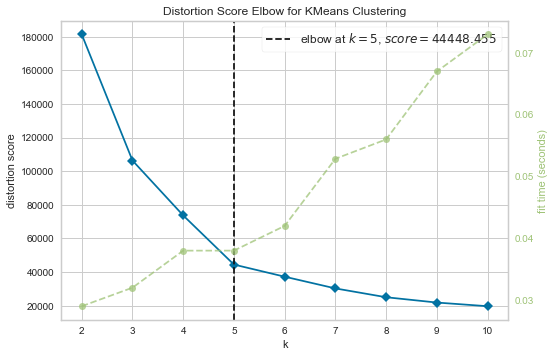

In [45]:
# yellowbrick

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,11))

visualizer.fit(X2)        
visualizer.show();

In [46]:
for num_clusters in range(2,11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    
    silhouette_avg = silhouette_score(X2, kmeans.labels_)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4565077334305076
For n_clusters=10, the silhouette score is 0.45925273534781125


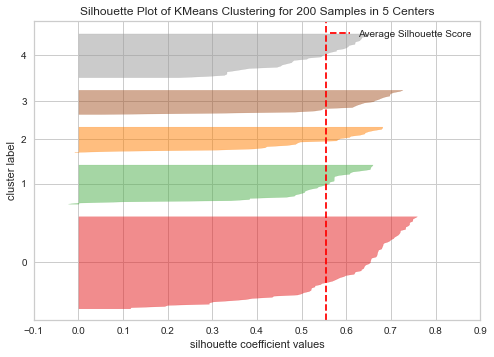

In [47]:
model = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X2)
visualizer.poof();

#### *iii. Apply K Means*

In [48]:
km_model2 = KMeans(n_clusters=5, random_state=42)
km_model2.fit(X2)

KMeans(n_clusters=5, random_state=42)

In [49]:
km_model2.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [50]:
df['predicted_clusters_2'] = km_model2.labels_

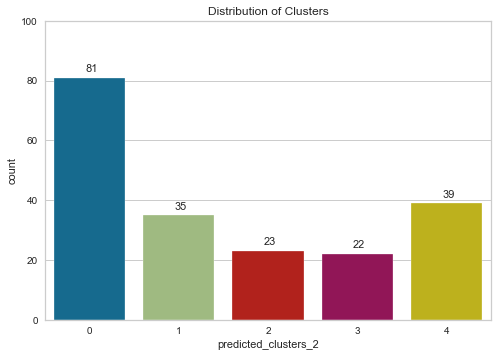

In [51]:
ax = sns.countplot(x='predicted_clusters_2', data=df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+2), fontsize=11)
    
ax.set_title('Distribution of Clusters')    
ax.set_ylim(0, 100);

In [52]:
df.sample(10)

,Gender,Age,Annual_Income,Spending_Score,predicted_clusters_1,predicted_clusters_2
44,Female,49,39,28,1,2
17,Male,20,21,66,3,3
96,Female,47,60,47,0,0
48,Female,29,40,42,3,0
90,Female,68,59,55,0,0
135,Female,29,73,88,2,4
170,Male,40,87,13,1,1
100,Female,23,62,41,3,0
111,Female,19,63,54,3,0
197,Male,32,126,74,2,4


#### *iv. Visualizing and Labeling All the Clusters*

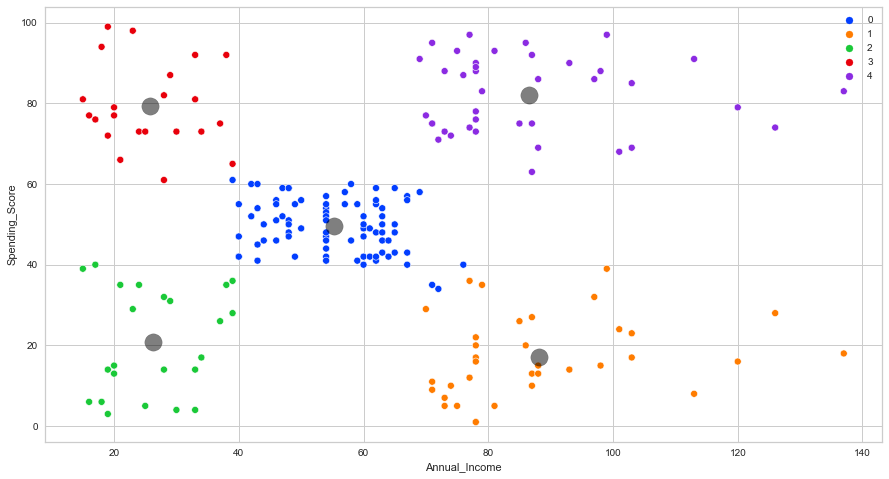

In [53]:
# centers of classes
plt.figure(figsize = (15,8))

centers = km_model2.cluster_centers_
sns.scatterplot(data=X2, x='Annual_Income', y='Spending_Score', hue=km_model2.labels_, palette='bright')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Hierarchical Clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [56]:
hc_ward = linkage(X1, "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

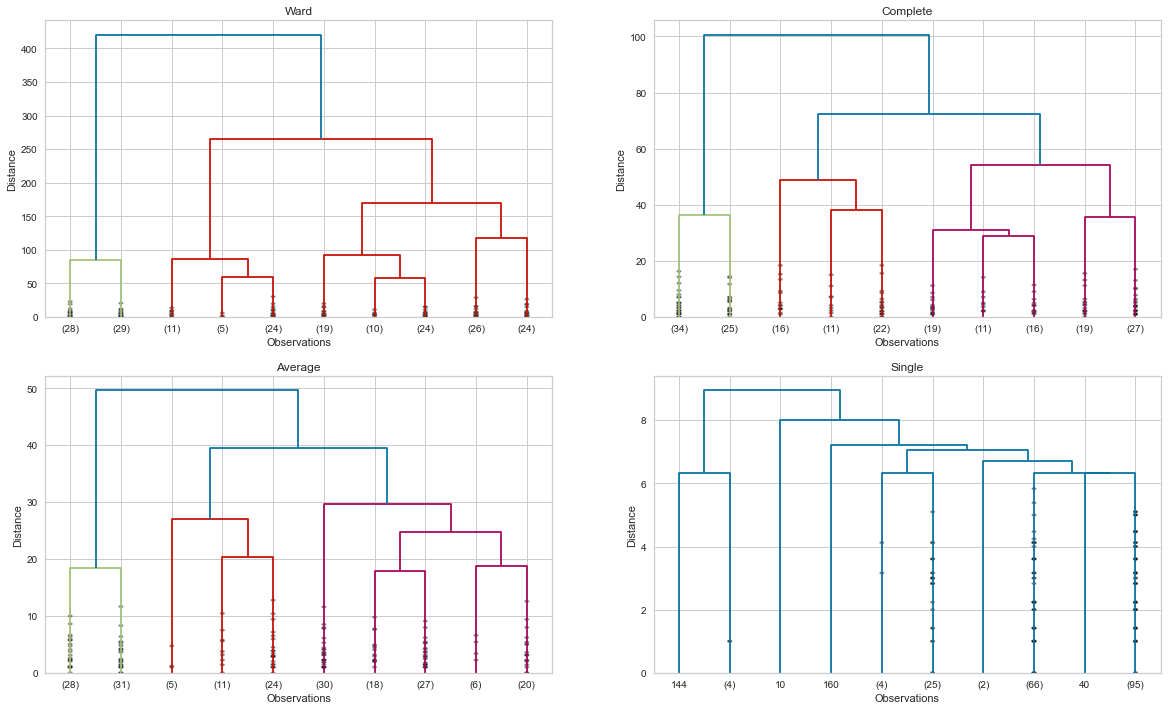

In [57]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10);

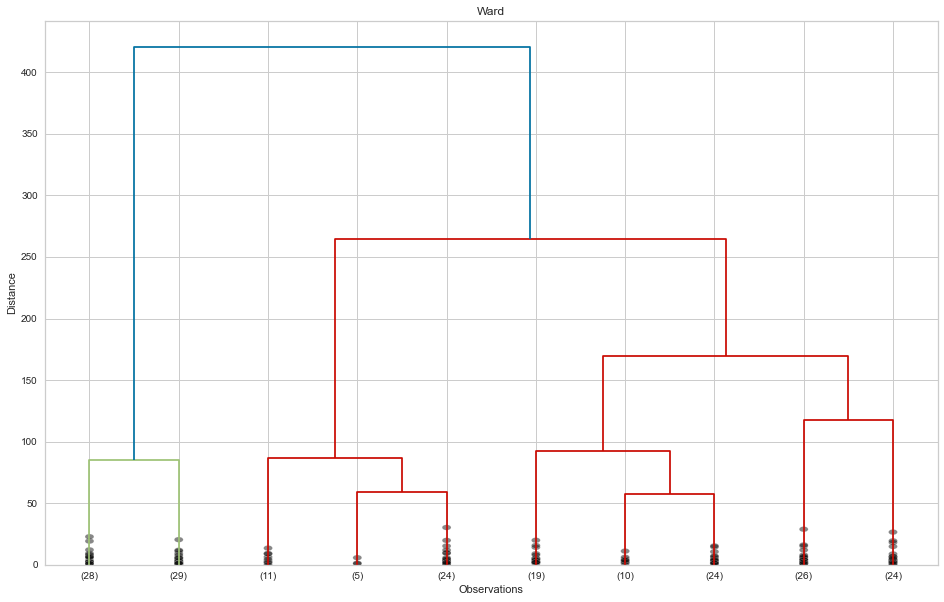

In [58]:
plt.figure(figsize = (16,10))

plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10);

In [59]:
# silhouette scores
for k in range(2,11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, agg.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091
Silhouette Score for 10 clusters: 0.3876666104778445


### Clustering based on Annual Income and Spending Score- x2

In [60]:
hc_ward = linkage(X2, "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

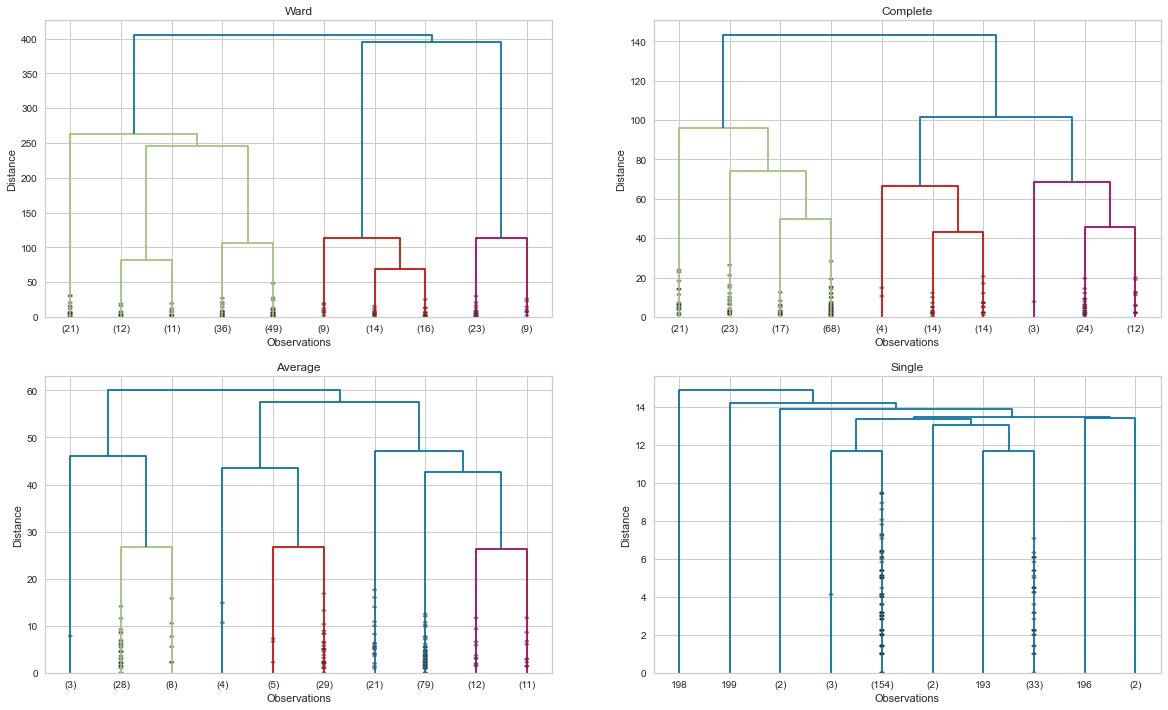

In [61]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10);

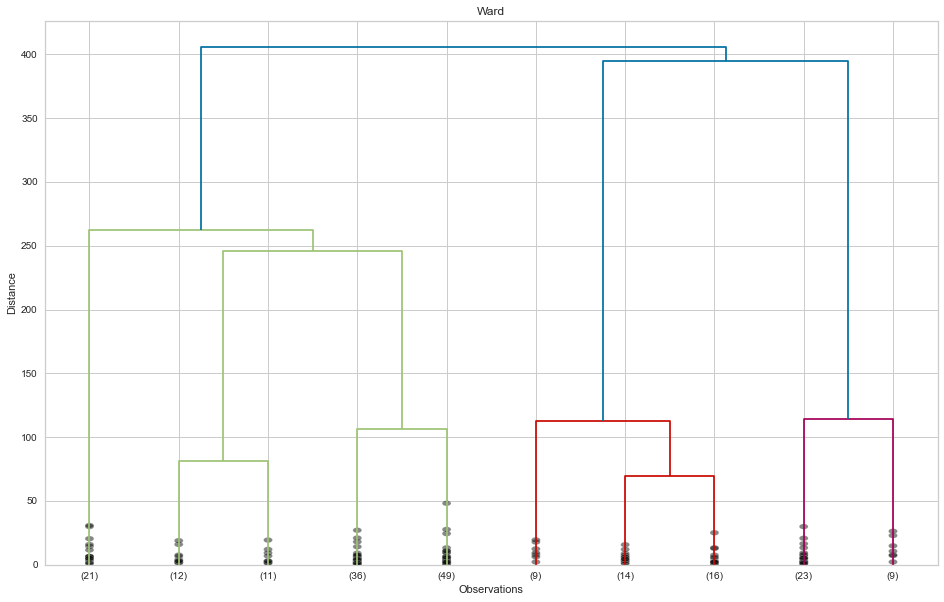

In [62]:
plt.figure(figsize = (16,10))

plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10);

In [63]:
# silhouette scores
for k in range(2,11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, agg.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507
Silhouette Score for 10 clusters: 0.4342656377895271


### *ii. Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [64]:
ag_model1 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
ag_model1.fit_predict(X1)
# ag_model1.labels_

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

In [65]:
df['predicted_clusters_3'] = ag_model1.labels_

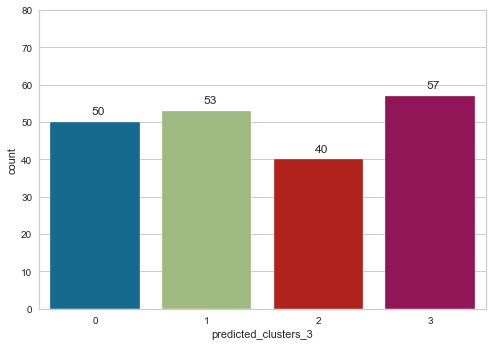

In [66]:
ax = sns.countplot(x='predicted_clusters_3', data=df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.37, p.get_height()+2), fontsize=12)
    
ax.set_ylim(0, 80);

In [67]:
df.sample(10)

,Gender,Age,Annual_Income,Spending_Score,predicted_clusters_1,predicted_clusters_2,predicted_clusters_3
154,Female,47,78,16,1,1,2
48,Female,29,40,42,3,0,0
191,Female,32,103,69,2,4,3
141,Male,32,75,93,2,4,3
120,Male,27,67,56,3,0,0
186,Female,54,101,24,1,1,0
116,Female,63,65,43,0,0,1
105,Female,21,62,42,3,0,0
69,Female,32,48,47,3,0,0
131,Male,39,71,75,2,4,3


<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

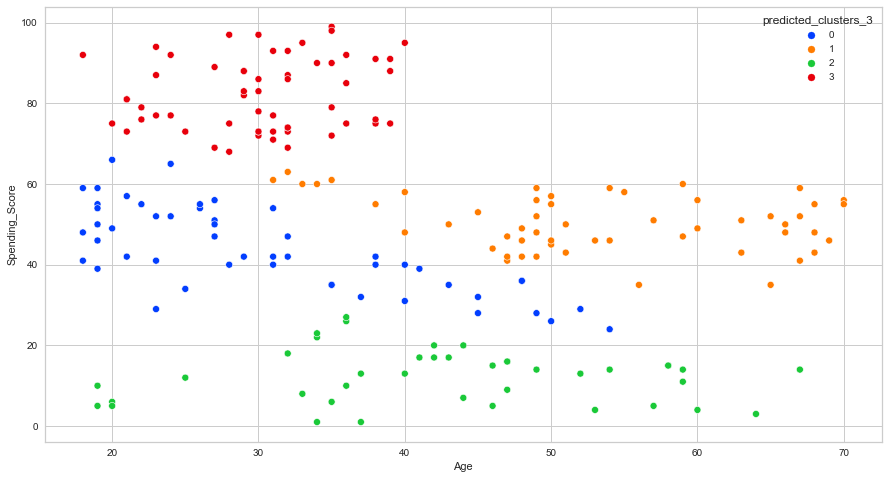

In [68]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=df, x='Age', y='Spending_Score', hue='predicted_clusters_3', palette='bright')

#### Annual Income and Spending Score- x2

In [69]:
ag_model2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
ag_model2.fit_predict(X2)
# ag_model2.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [70]:
df['predicted_clusters_4'] = ag_model2.labels_

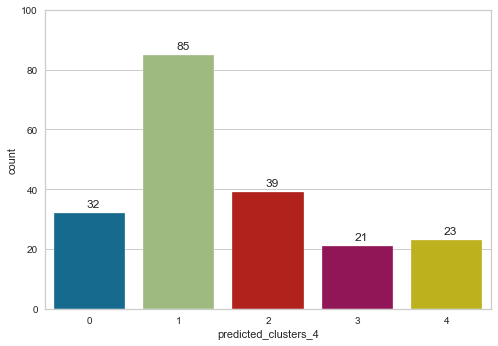

In [71]:
ax = sns.countplot(x='predicted_clusters_4', data=df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.37, p.get_height()+2), fontsize=12)
    
ax.set_ylim(0, 100);

In [72]:
df.sample(10)

,Gender,Age,Annual_Income,Spending_Score,predicted_clusters_1,predicted_clusters_2,predicted_clusters_3,predicted_clusters_4
144,Male,25,77,12,1,1,2,0
98,Male,48,61,42,0,0,1,1
174,Female,52,88,13,1,1,2,0
147,Female,32,77,74,2,4,3,2
95,Male,24,60,52,3,0,0,1
118,Female,51,67,43,0,0,1,1
92,Male,48,60,49,0,0,1,1
194,Female,47,120,16,1,1,2,0
61,Male,19,46,55,3,0,0,1
19,Female,35,23,98,2,3,3,3


<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

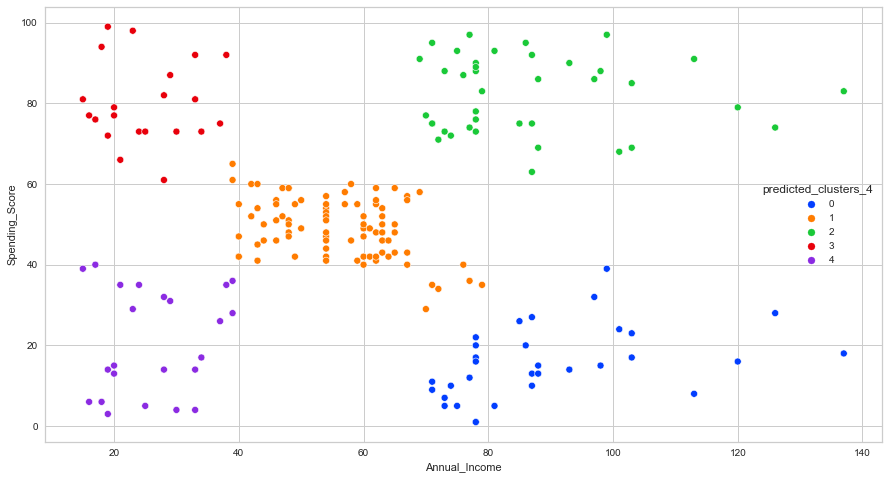

In [73]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='predicted_clusters_4', palette='bright')

### *iii. Visualizing and Labeling All the Clusters* 

In [74]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,predicted_clusters_1,predicted_clusters_2,predicted_clusters_3,predicted_clusters_4
0,Male,19,15,39,3,2,0,4
1,Male,21,15,81,2,3,3,3
2,Female,20,16,6,1,2,2,4
3,Female,23,16,77,2,3,3,3
4,Female,31,17,40,3,2,0,4


#### Age and Spending Score- x1

In [75]:
pd.crosstab(df['predicted_clusters_1'], df['predicted_clusters_3'])

predicted_clusters_3,0,1,2,3
predicted_clusters_1,,,,
0,3,45,0,0
1,8,0,40,0
2,0,0,0,57
3,39,8,0,0


In [76]:
df['predicted_clusters_3'].replace([0,1,2,3], [3,0,1,2], inplace=True)

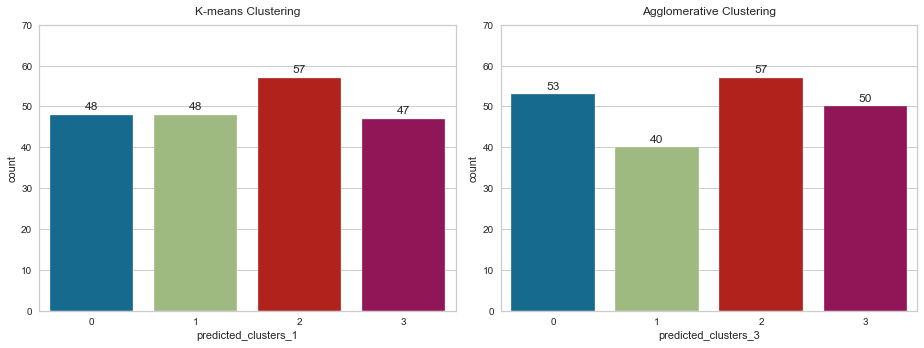

In [77]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

a=sns.countplot(x='predicted_clusters_1', data=df, ax=ax[0])
b=sns.countplot(x='predicted_clusters_3', data=df, ax=ax[1])

a.bar_label(a.containers[0], padding=3, fontsize=12)
b.bar_label(b.containers[0], padding=3, fontsize=12)
    
a.set_title('K-means Clustering', pad=10)
b.set_title('Agglomerative Clustering', pad=10)

a.set_ylim(0,70), b.set_ylim(0,70)
fig.tight_layout();

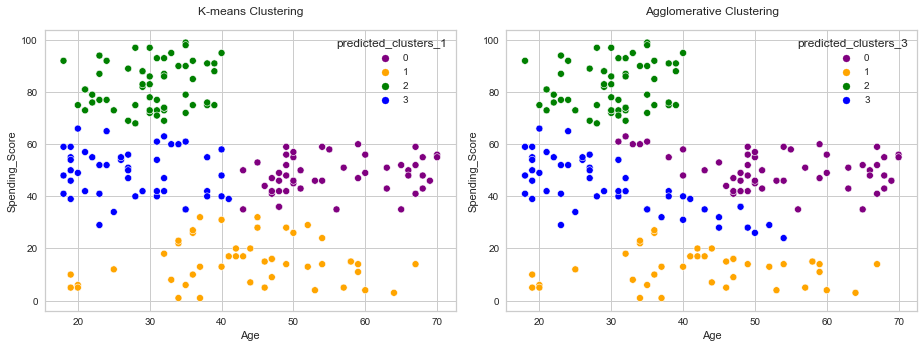

In [78]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

palette=['purple','orange','green','blue']
sns.scatterplot(x='Age', y='Spending_Score', data=df, hue='predicted_clusters_1', palette=palette, ax = ax[0])
sns.scatterplot(x='Age', y='Spending_Score', data=df, hue='predicted_clusters_3', palette=palette, ax = ax[1])
   
ax[0].set_title('K-means Clustering', pad=15)
ax[1].set_title('Agglomerative Clustering', pad=15)

fig.tight_layout();

#### Annual Income and Spending Score- x2

In [79]:
pd.crosstab(df['predicted_clusters_2'], df['predicted_clusters_4'])

predicted_clusters_4,0,1,2,3,4
predicted_clusters_2,,,,,
0,0,81,0,0,0
1,32,3,0,0,0
2,0,0,0,0,23
3,0,1,0,21,0
4,0,0,39,0,0


In [80]:
df['predicted_clusters_4'].replace([0,1,2,3,4], [1,0,4,3,2], inplace=True)

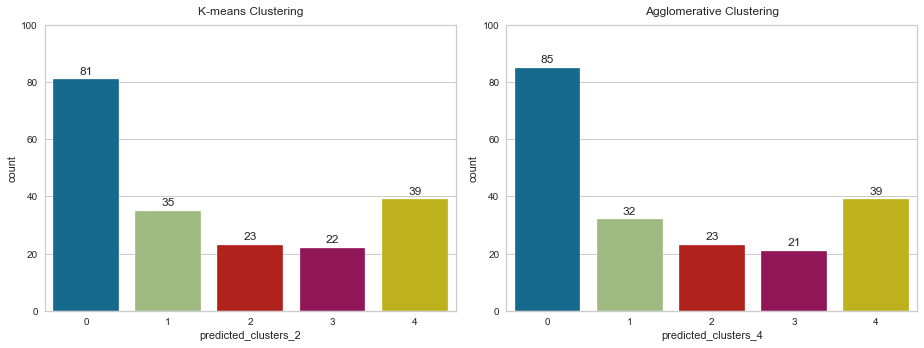

In [81]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

a=sns.countplot(x='predicted_clusters_2', data=df, ax=ax[0])
b=sns.countplot(x='predicted_clusters_4', data=df, ax=ax[1])

a.bar_label(a.containers[0], padding=3, fontsize=12)
b.bar_label(b.containers[0], padding=3, fontsize=12)
    
a.set_title('K-means Clustering', pad=10)
b.set_title('Agglomerative Clustering', pad=10)

a.set_ylim(0,100), b.set_ylim(0,100)
fig.tight_layout();

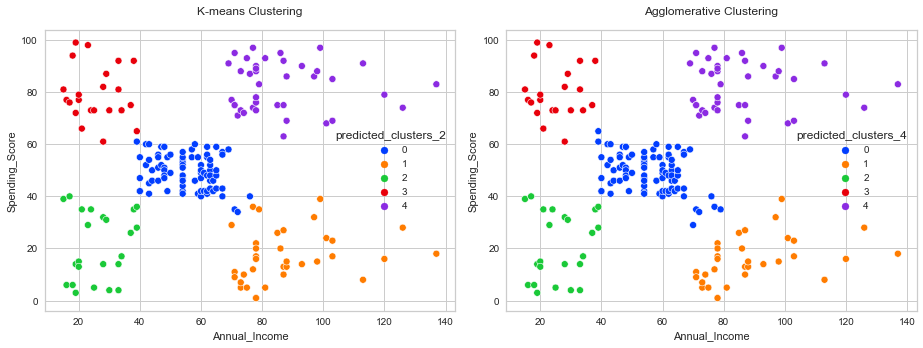

In [82]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue='predicted_clusters_2', palette='bright', ax = ax[0])
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue='predicted_clusters_4', palette='bright', ax = ax[1])
   
ax[0].set_title('K-means Clustering', pad=15)
ax[1].set_title('Agglomerative Clustering', pad=15)

fig.tight_layout();

#### Interpretation based on Age and Spending Score- x1

In [83]:
df_1 = df.iloc[:, :5]
df_1.head()

,Gender,Age,Annual_Income,Spending_Score,predicted_clusters_1
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


In [84]:
df_1.groupby(['predicted_clusters_1']).agg(['count', 'mean'])

Age        Annual_Income        Spending_Score       
                     count   mean         count   mean          count   mean
predicted_clusters_1                                                        
0                       48 55.708            48 54.771             48 48.229
1                       48 43.292            48 66.938             48 15.021
2                       57 30.175            57 66.070             57 82.351
3                       47 27.617            47 53.277             47 49.149

(0.0, 40.0)

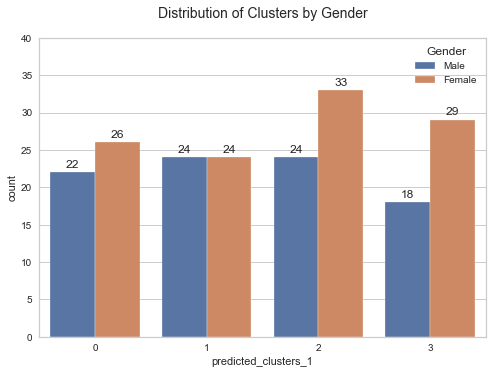

In [85]:
ax = sns.countplot(data=df_1, x='predicted_clusters_1', hue='Gender', palette='deep')
for p in ax.containers: ax.bar_label(p, fontsize=12, padding=3)
ax.set_title('Distribution of Clusters by Gender', pad=20, fontsize=14)
ax.set_ylim(0, 40)

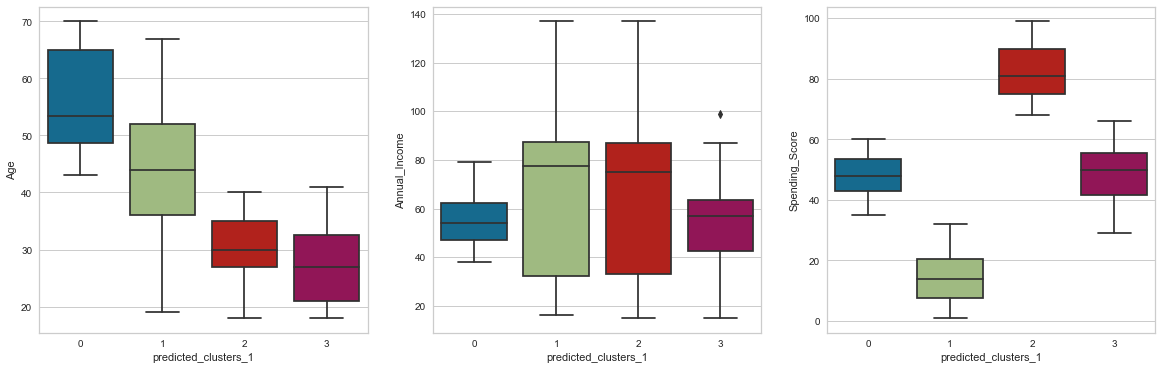

In [86]:
index = 0
plt.figure(figsize=(20,6))
for col in df_1.iloc[:, 1:4]:    
    index += 1
    plt.subplot(1,3,index)
    sns.boxplot(data=df_1, y=col, x='predicted_clusters_1')

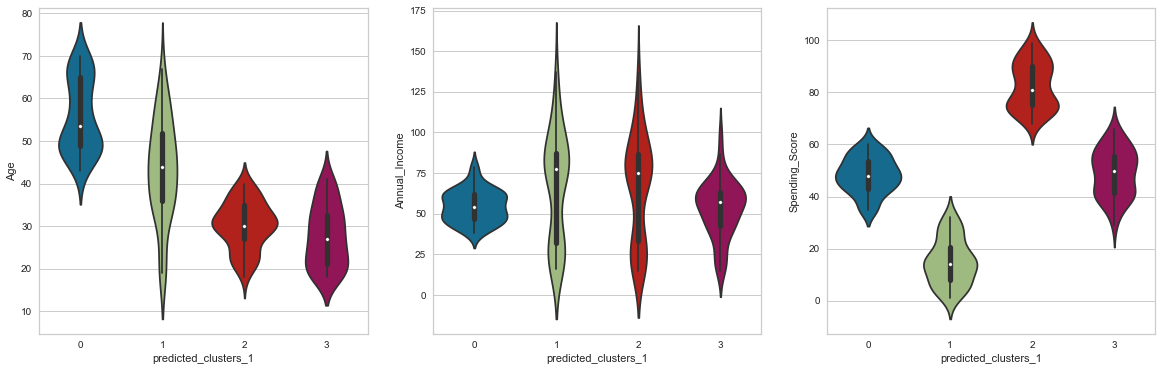

In [87]:
index = 0
plt.figure(figsize=(20,6))
for col in df_1.iloc[:, 1:4]:    
    index += 1
    plt.subplot(1,3,index)
    sns.violinplot(data=df_1, y=col, x='predicted_clusters_1')

Text(0.5, 1.0, 'Means of Features by Clusters')

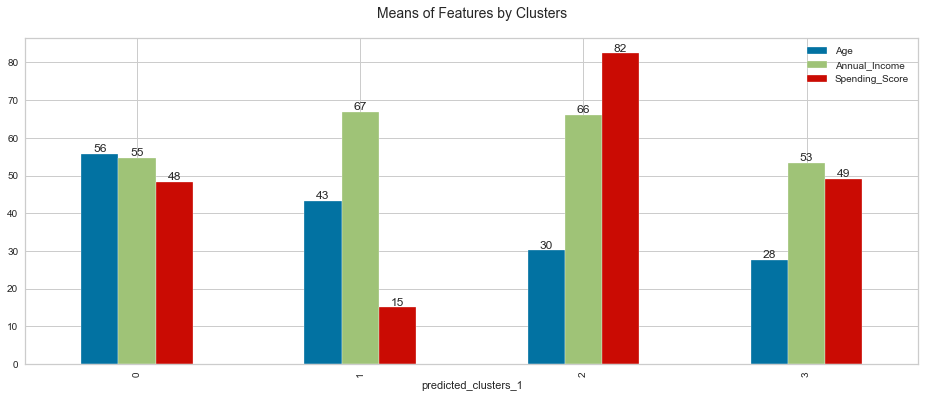

In [88]:
ax = df_1.groupby('predicted_clusters_1').mean().plot(kind='bar', figsize = (16,6))
for p in ax.containers: ax.bar_label(p, fmt='%.0f')
ax.set_title('Means of Features by Clusters', pad=20, fontsize=14)

### Conclusion

**cluster 0** : The average age is around 55, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annual_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annual_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25. Both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [89]:
df_2 = df[['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'predicted_clusters_2']]
df_2.head()

,Gender,Age,Annual_Income,Spending_Score,predicted_clusters_2
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [90]:
df_2.groupby(['predicted_clusters_2']).agg(['count', 'mean'])

Age        Annual_Income        Spending_Score       
                     count   mean         count   mean          count   mean
predicted_clusters_2                                                        
0                       81 42.716            81 55.296             81 49.519
1                       35 41.114            35 88.200             35 17.114
2                       23 45.217            23 26.304             23 20.913
3                       22 25.273            22 25.727             22 79.364
4                       39 32.692            39 86.538             39 82.128

(0.0, 60.0)

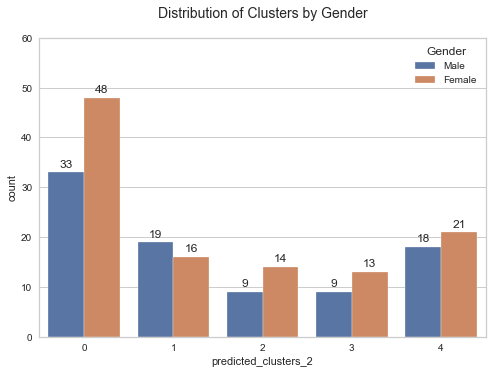

In [91]:
ax = sns.countplot(data=df_2, x='predicted_clusters_2', hue='Gender', palette='deep')
for p in ax.containers: ax.bar_label(p, fontsize=12, padding=3)
ax.set_title('Distribution of Clusters by Gender', pad=20, fontsize=14)
ax.set_ylim(0, 60)

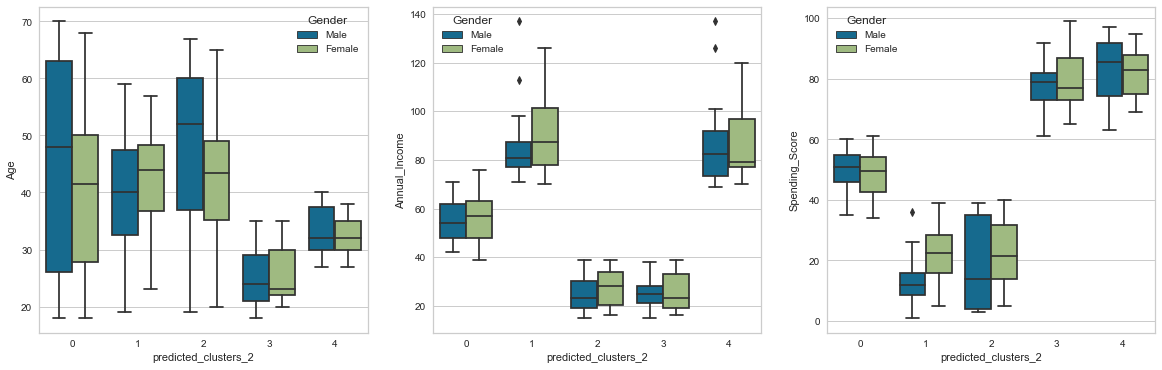

In [92]:
index = 0
plt.figure(figsize=(20,6))
for col in df_2.iloc[:, 1:4]:    
    index += 1
    plt.subplot(1,3,index)
    sns.boxplot(data=df_2, y=col, x='predicted_clusters_2', hue='Gender')

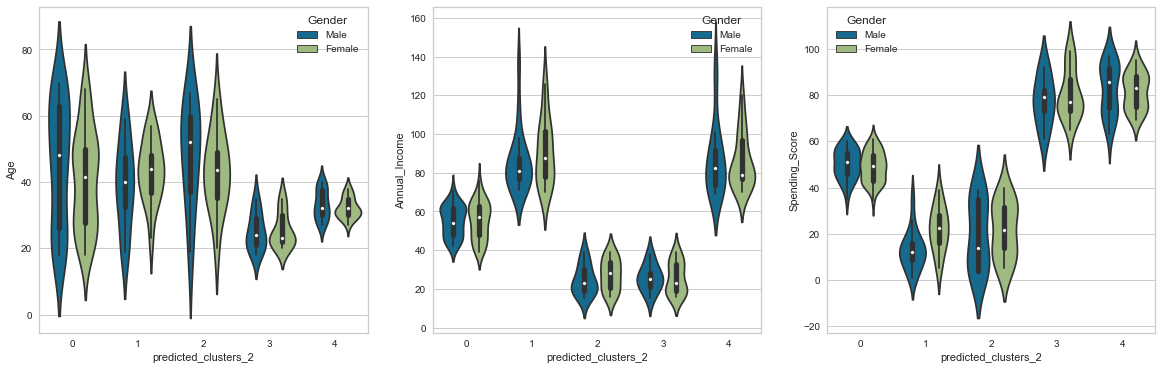

In [93]:
index = 0
plt.figure(figsize=(20,6))
for col in df_2.iloc[:, 1:4]:    
    index += 1
    plt.subplot(1,3,index)
    sns.violinplot(data=df_2, y=col, x='predicted_clusters_2', hue='Gender')

Text(0.5, 1.0, 'Means of Features by Gender and Clusters')

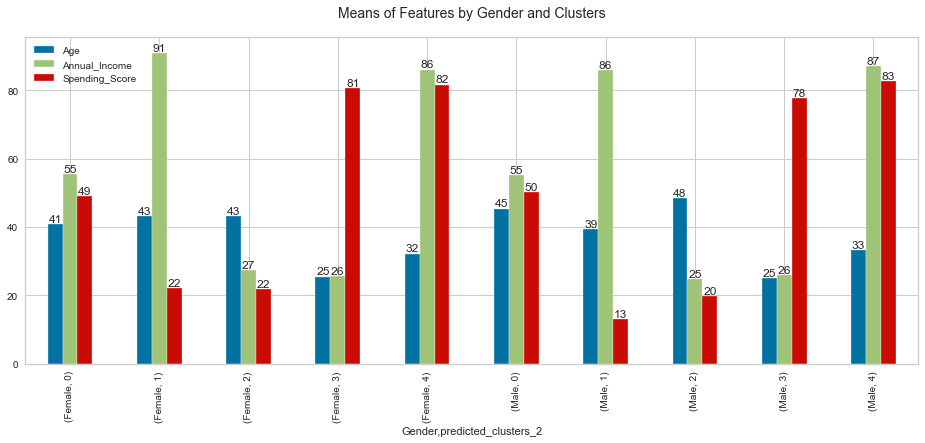

In [94]:
ax = df_2.groupby(['Gender','predicted_clusters_2']).mean().plot(kind='bar', figsize = (16,6))
for p in ax.containers: ax.bar_label(p, fmt='%.0f')
ax.set_title('Means of Features by Gender and Clusters', pad=20, fontsize=14)

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annual_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annual_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_income but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual_income income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annual_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annual_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_income but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual_income income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

Text(0.5, 1.0, 'Means of Features by Clusters')

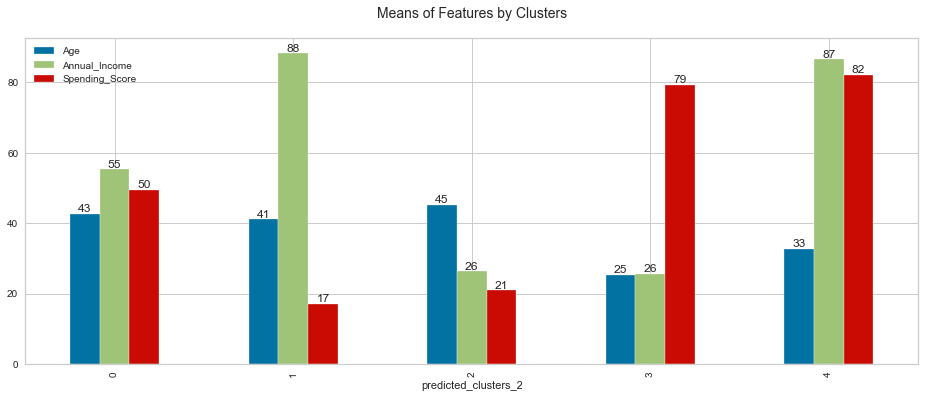

In [95]:
ax = df_2.groupby('predicted_clusters_2').mean().plot(kind='bar', figsize = (16,6))
for p in ax.containers: ax.bar_label(p, fmt='%.0f')
ax.set_title('Means of Features by Clusters', pad=20, fontsize=14)

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___